In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc

In [2]:
df = pd.read_csv(r"C:\My Project\Breast Cancer METABRIC.csv")

## **EDA**

In [3]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [5]:
df.shape

(2509, 34)

In [6]:
df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


Here are some key insights based on the dataset you provided:

1. **Age at Diagnosis**:
   - The average age at diagnosis is approximately 60.42 years, with a range spanning from around 21.93 to 96.29 years.
   - The age distribution indicates a concentration of diagnoses in individuals around their 50s to 70s.

2. **Cohort**:
   - The dataset includes multiple cohorts, with the majority likely concentrated within Cohort 3 (median value).

3. **Neoplasm Histologic Grade**:
   - Most cases fall within Grade 2 or 3 (median and upper quartile align with Grade 3).
   - Histologic Grade 3 seems more frequent as it dominates the median and upper quartiles.

4. **Lymph Nodes Examined Positive**:
   - The majority of patients have 0 to 2 positive lymph nodes, as seen in the interquartile range.
   - However, a maximum of 45 positive lymph nodes is noted, indicating significant variation.

5. **Mutation Count**:
   - The mutation count varies widely, with an average around 5.58 and a maximum of 80 mutations.
   - This could indicate a diverse range of genetic alterations within the cases.

6. **Nottingham Prognostic Index (NPI)**:
   - The median index is around 4.04, suggesting most patients have a moderate prognosis.
   - A few cases fall on the extreme ends, with an index as low as 1 and as high as 7.2.

7. **Overall Survival (OS) Months**:
   - The average survival period is about 125 months, with a wide spread from 0 to 355 months.
   - Approximately 25% of patients survive less than 60 months, while the top quartile exceeds 185 months.

8. **Relapse-Free Status (RFS) Months**:
   - Relapse-free intervals average approximately 108.84 months, with some patients achieving up to 384 months.
   - However, a significant portion experiences early relapses, as seen in the minimum value of 0 months.

9. **Tumor Size**:
   - Tumor sizes range from 1 mm to a striking maximum of 182 mm.
   - The median size lies around 22.41 mm, indicating that most tumors are relatively small.

10. **Tumor Stage**:
    - Most patients are diagnosed at Stage 1 or 2 (median of Stage 2).

In [7]:
df.columns = df.columns.str.strip().str.lower()

In [8]:
df.dtypes

patient id                         object
age at diagnosis                  float64
type of breast surgery             object
cancer type                        object
cancer type detailed               object
cellularity                        object
chemotherapy                       object
pam50 + claudin-low subtype        object
cohort                            float64
er status measured by ihc          object
er status                          object
neoplasm histologic grade         float64
her2 status measured by snp6       object
her2 status                        object
tumor other histologic subtype     object
hormone therapy                    object
inferred menopausal state          object
integrative cluster                object
primary tumor laterality           object
lymph nodes examined positive     float64
mutation count                    float64
nottingham prognostic index       float64
oncotree code                      object
overall survival (months)         

<Figure size 1200x600 with 0 Axes>

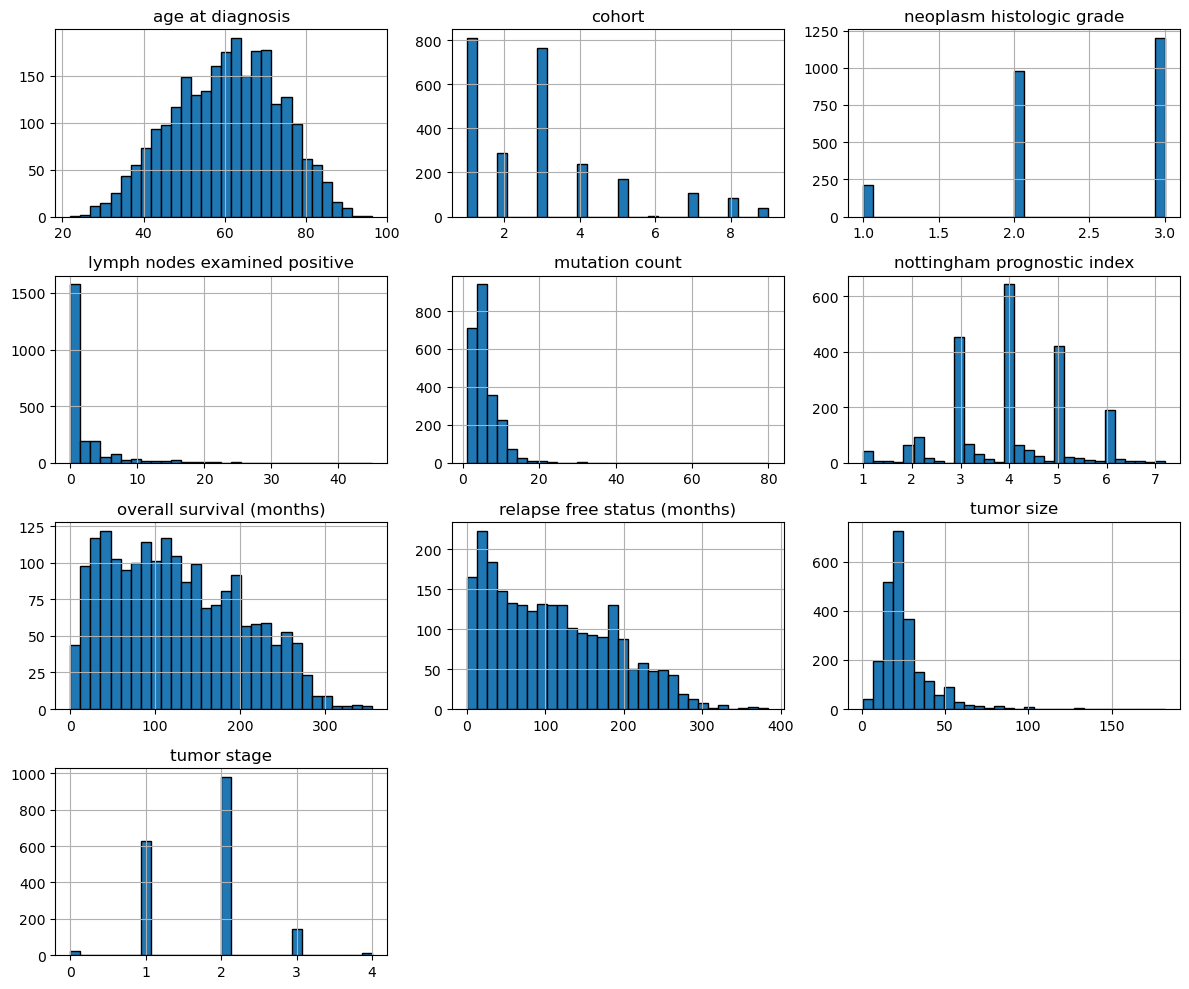

In [9]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10),bins=30, edgecolor='black')  
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['patient id', 'age at diagnosis', 'type of breast surgery',
       'cancer type', 'cancer type detailed', 'cellularity', 'chemotherapy',
       'pam50 + claudin-low subtype', 'cohort', 'er status measured by ihc',
       'er status', 'neoplasm histologic grade',
       'her2 status measured by snp6', 'her2 status',
       'tumor other histologic subtype', 'hormone therapy',
       'inferred menopausal state', 'integrative cluster',
       'primary tumor laterality', 'lymph nodes examined positive',
       'mutation count', 'nottingham prognostic index', 'oncotree code',
       'overall survival (months)', 'overall survival status', 'pr status',
       'radio therapy', 'relapse free status (months)', 'relapse free status',
       'sex', '3-gene classifier subtype', 'tumor size', 'tumor stage',
       'patient's vital status'],
      dtype='object')

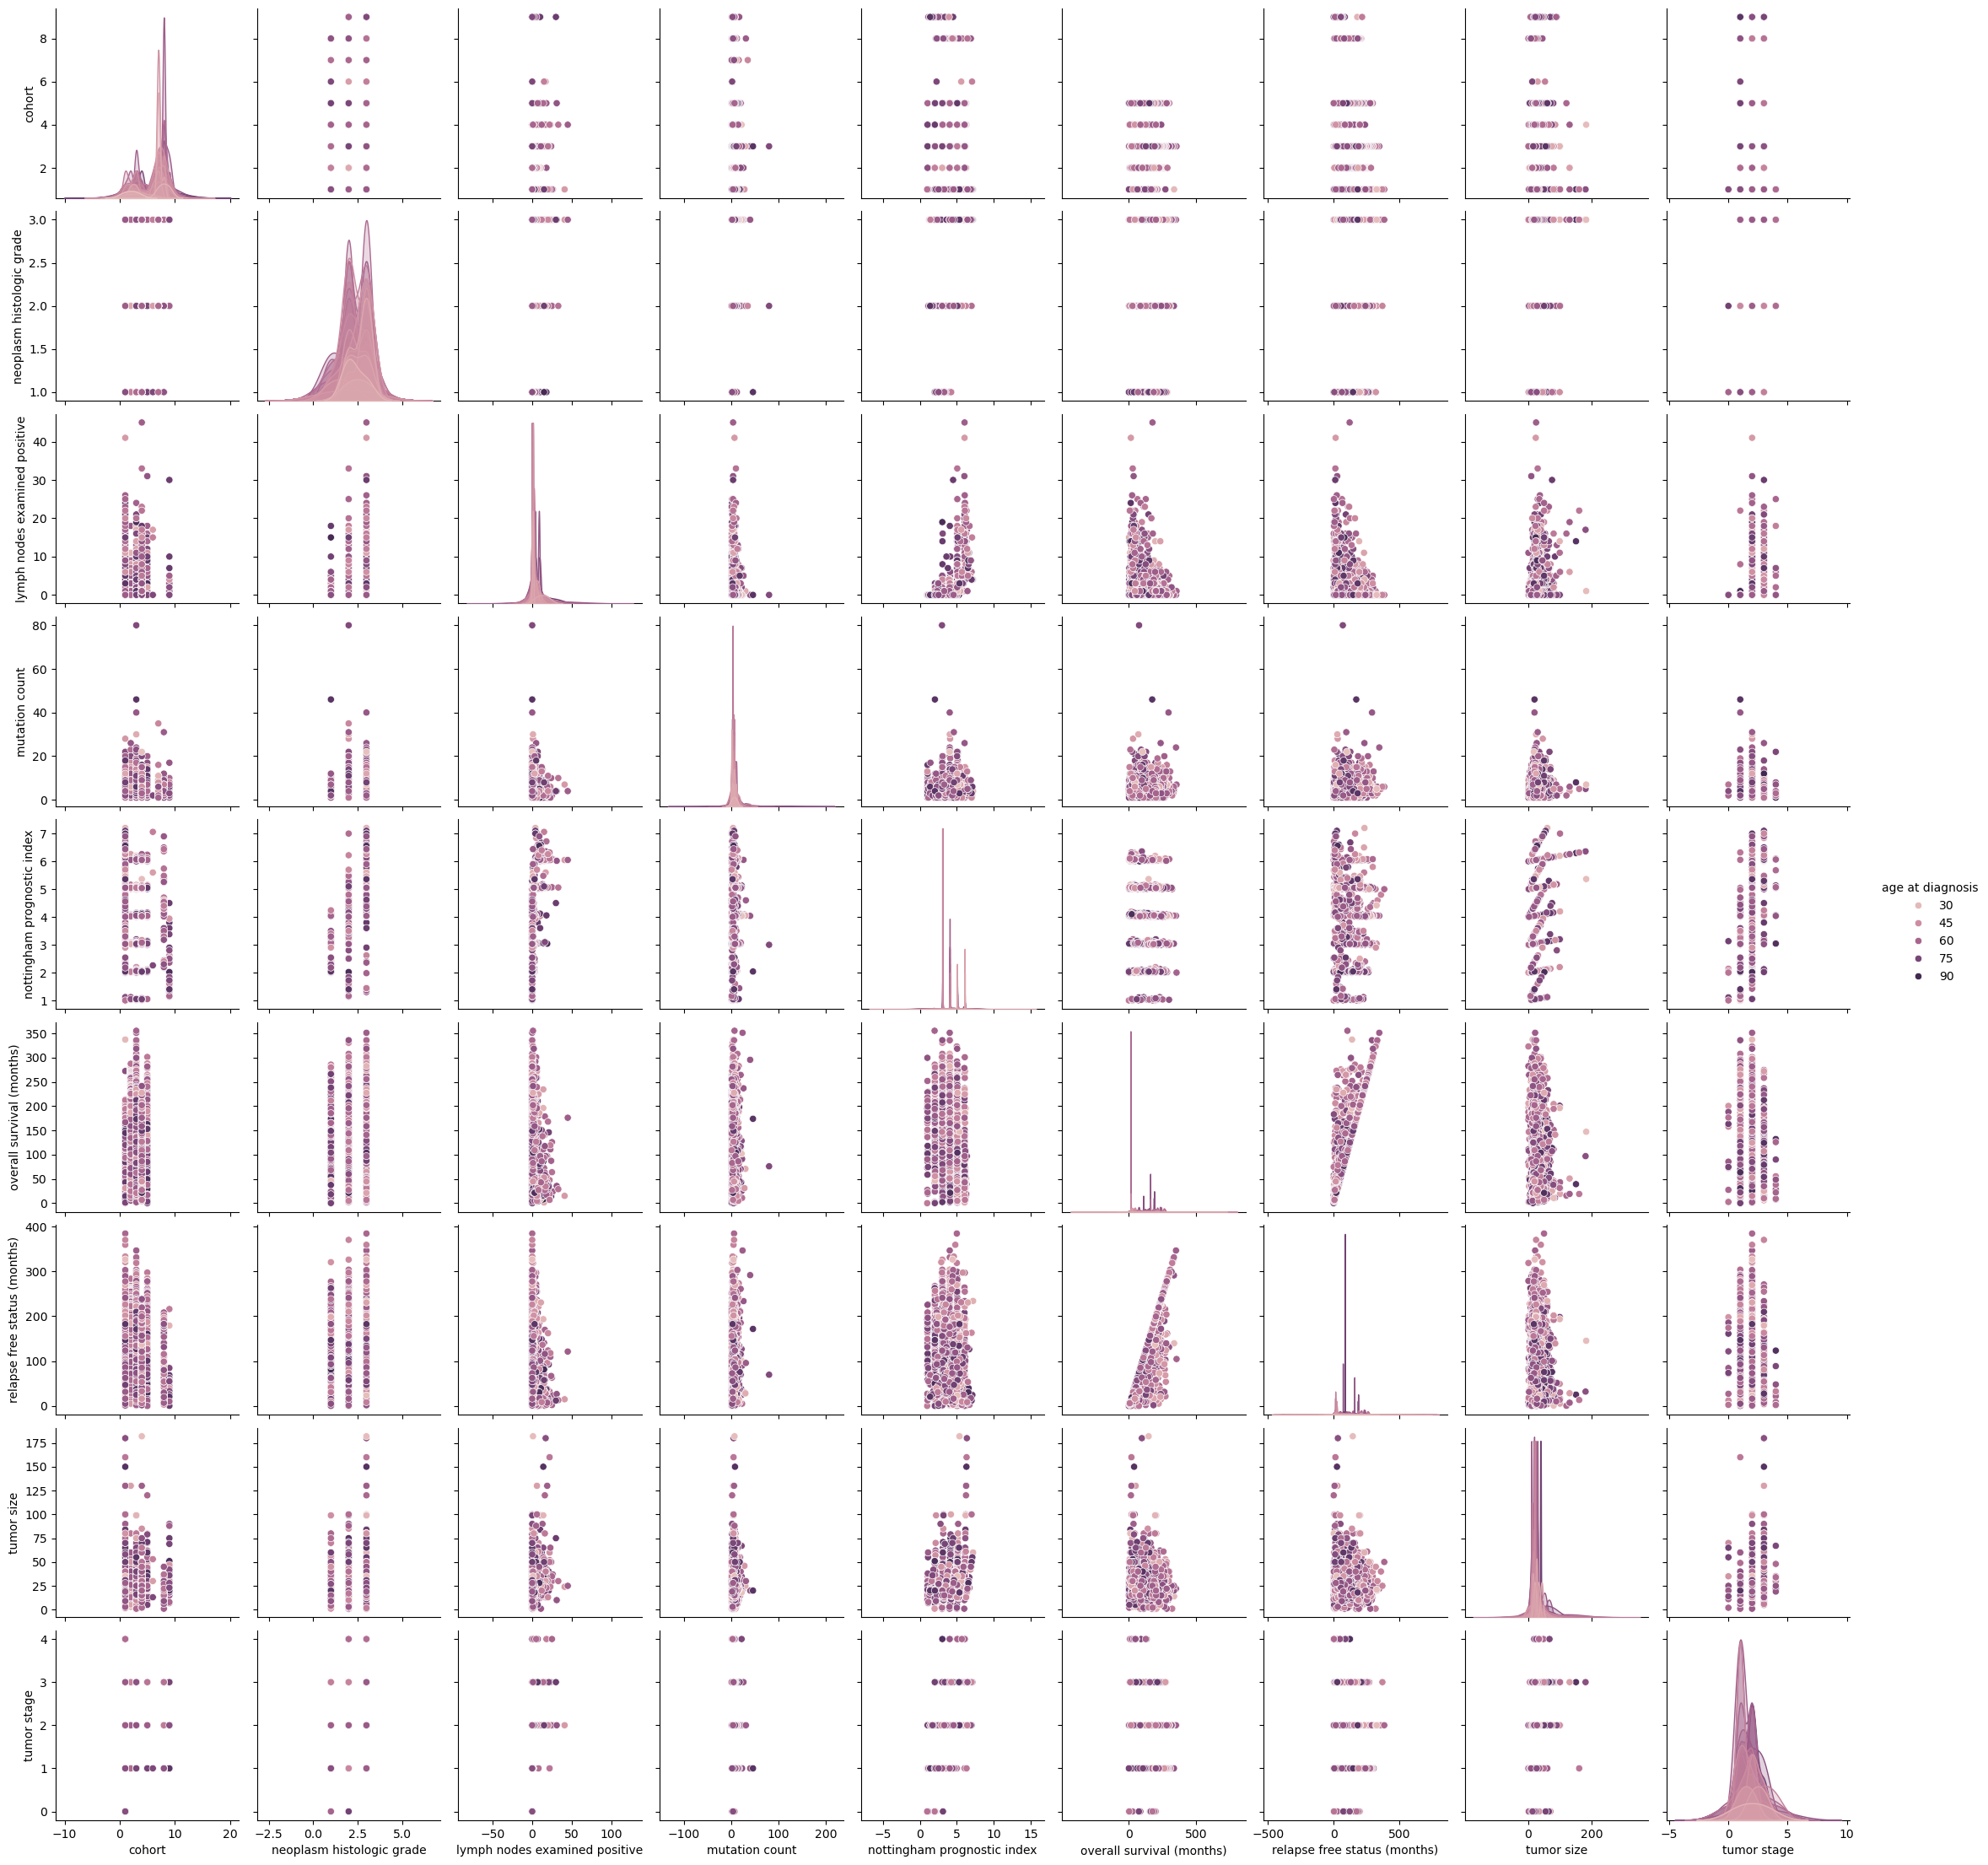

In [11]:
sns.pairplot(df,hue = 'age at diagnosis')

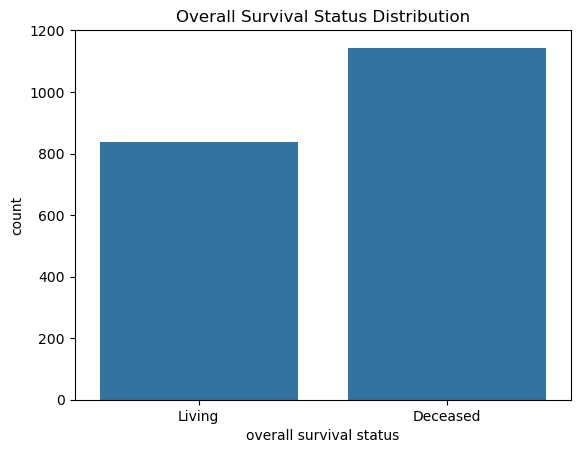

In [12]:
if 'overall survival status' in df.columns:
    sns.countplot(x = df['overall survival status'])
    plt.title('Overall Survival Status Distribution')
    plt.show()

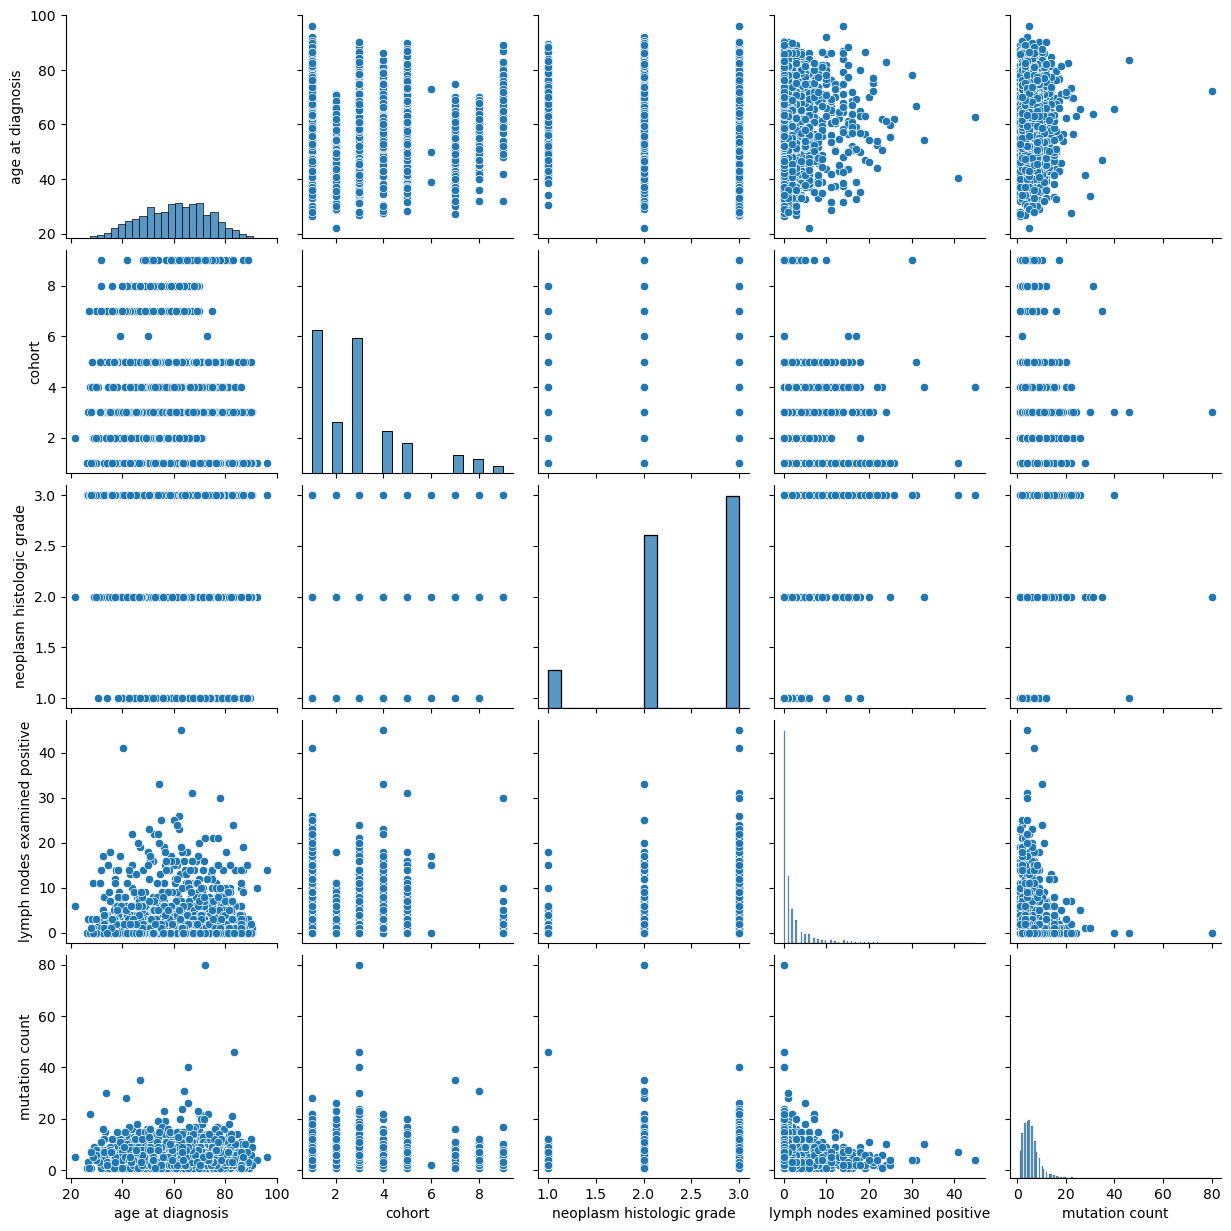

In [13]:
# Pairplot for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns[:5]
sns.pairplot(df[numerical_cols])
plt.show()

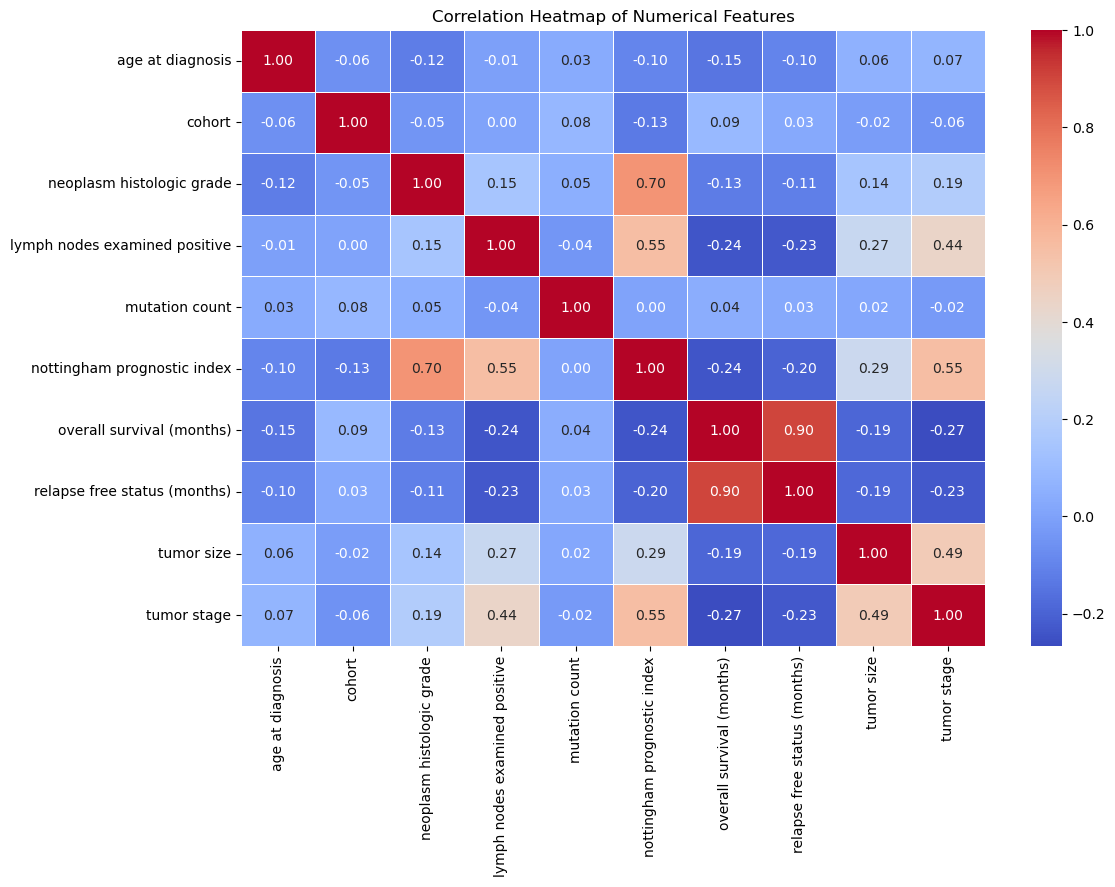

In [14]:
corr_matrix = df.select_dtypes(include=["float64","int64"]).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

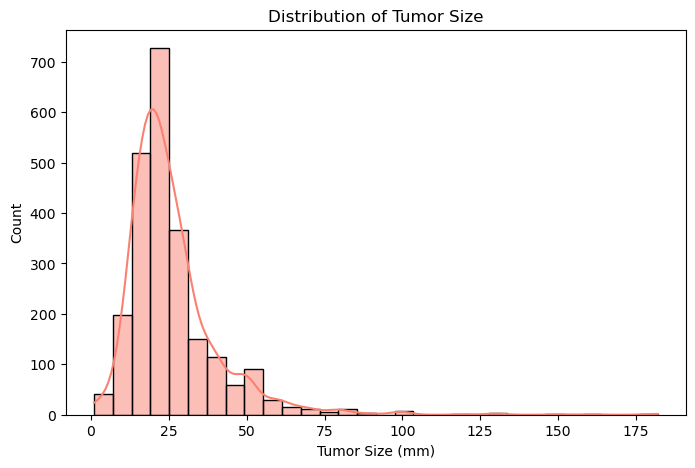

In [15]:
# Tumor Size Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["tumor size"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Tumor Size")
plt.xlabel("Tumor Size (mm)")
plt.ylabel("Count")
plt.show()

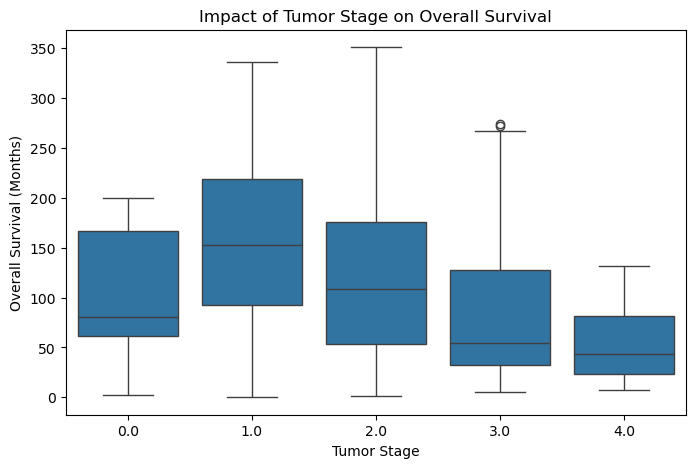

In [16]:
# Impact of Tumor Stage on Survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="tumor stage", y="overall survival (months)")
plt.title("Impact of Tumor Stage on Overall Survival")
plt.xlabel("Tumor Stage")
plt.ylabel("Overall Survival (Months)")
plt.show()

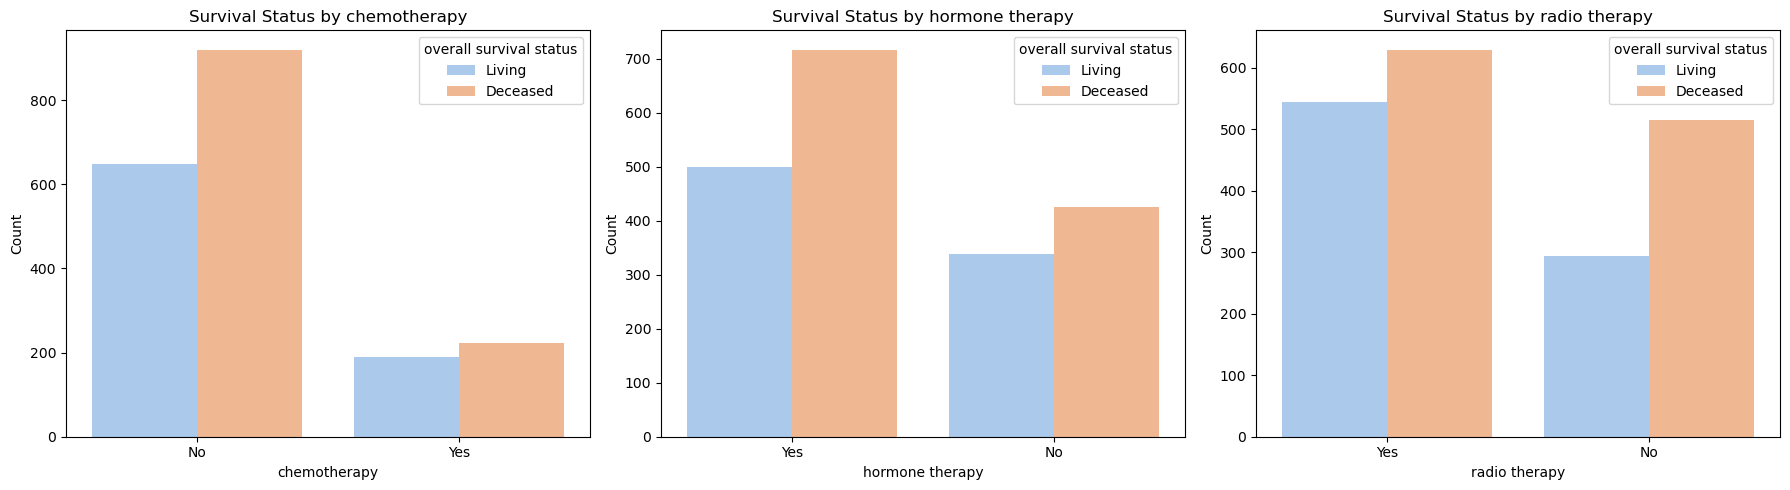

In [17]:
# Treatment vs. Survival Outcome (Chemotherapy, Hormone Therapy, Radio Therapy)
treatment_columns = ["chemotherapy", "hormone therapy", "radio therapy"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, treatment in enumerate(treatment_columns):
    sns.countplot(data=df, x=treatment, hue="overall survival status", palette="pastel", ax=axes[i])
    axes[i].set_title(f"Survival Status by {treatment}")
    axes[i].set_xlabel(treatment)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Feature Engineering**

In [18]:
df.isnull().sum().sum()

10929

In [19]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply SimpleImputer for numerical columns (median)
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Apply SimpleImputer for categorical columns (mode)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify if all missing values are handled
df.isnull().sum().sum()

0

In [20]:
label_encoders = {}
for col in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders = le

In [21]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [22]:
# Convert target variable to binary classification
y = df['overall survival status']
y = (y > y.median()).astype(int)  # Convert to 0 or 1 based on median threshold
df['overall survival status'] = y

In [23]:
if 'overall survival status' in df.columns:
    X = df.drop(columns=['overall survival status'])  # Removing target variable
    selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
    X_new = selector.fit_transform(X, y)  # Fitting selector to data
    selected_features = X.columns[selector.get_support()]  # Extracting selected features
    df = df[selected_features.tolist() + ['overall survival status']]  # Keeping only selected features
    print("Selected Features:", selected_features.tolist())  

Selected Features: ['patient id', 'age at diagnosis', 'type of breast surgery', 'cohort', 'inferred menopausal state', 'integrative cluster', 'overall survival (months)', 'relapse free status (months)', 'relapse free status', "patient's vital status"]


C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [24]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
principal_components = pca.fit_transform(df.drop(columns =['overall survival status']))
df_pca = pd.DataFrame(principal_components,columns=[f'PC{i+1}' for i in range(5)])
df_pca['overall survival status'] = df['overall survival status']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df_pca.drop(columns = ['overall survival status']), df_pca['overall survival status'], test_size=0.2,random_state=42)

# **Logistics Regression**

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [27]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.89, ROC AUC: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       342
           1       0.83      0.83      0.83       160

    accuracy                           0.89       502
   macro avg       0.87      0.87      0.87       502
weighted avg       0.89      0.89      0.89       502



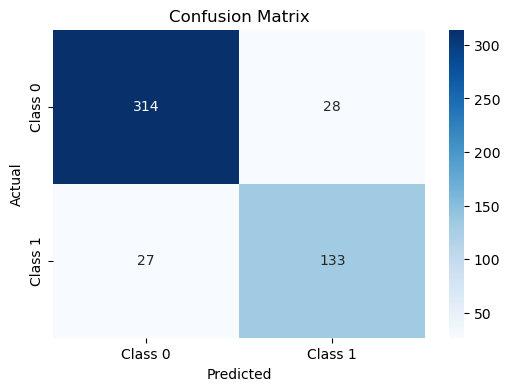

In [28]:
cm_lr= confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm_lr, annot = True, fmt='d',cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1. Model Performance
Overall Accuracy: ~89.04% – The model performs well in classifying survival outcomes.

Precision (82.6%) – When the model predicts survival, it is correct about 82.6% of the time.

Recall (83.1%) – The model correctly identifies 83.1% of actual survivors.

2. Confusion Matrix Analysis
| **Actual \ Predicted** | **Class 0 (No Survival)** | **Class 1 (Survival)** |
|------------------------|--------------------------|------------------------|
| **Class 0 (No Survival)** | ✅ 314 (True Negative - Correctly Identified) | ❌ 28 (False Positive - Incorrectly Predicted Survival) |
| **Class 1 (Survival)** | ❌ 27 (False Negative - Missed Survivors) | ✅ 133 (True Positive - Correctly Predicted Survival) |



**Desicion Tree**

In [29]:
# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

In [30]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}, ROC AUC: {roc_auc_tree:.2f}')
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.91, ROC AUC: 0.91
Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       342
           1       0.85      0.89      0.87       160

    accuracy                           0.91       502
   macro avg       0.90      0.91      0.90       502
weighted avg       0.92      0.91      0.91       502



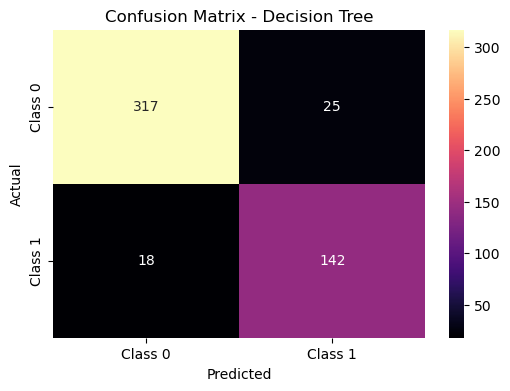

In [31]:
# Compute the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='magma', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

1. Overall Performance

    - Accuracy: 91% (The model correctly predicts survival status 91% of the time).

    - ROC AUC Score: 91% (Indicates strong separability between survival and non-survival classes).

2. Confusion Matrix - Decision Tree

| Actual \ Predicted | Class 0 (No Survival) | Class 1 (Survival) |
|--------------------|----------------------|--------------------|
| **Class 0 (No Survival)** | ✅ 317 (True Negative) | ❌ 25 (False Positive) |
| **Class 1 (Survival)** | ❌ 18 (False Negative) | ✅ 142 (True Positive) |

3. Precision, Recall & F1-Score

    - For Class 0 (No Survival):

        - Precision: 95% (When the model predicts no survival, it's correct 95% of the time).

        - Recall: 93% (Out of all actual non-survivors, 93% were correctly classified).

    - For Class 1 (Survival):

        - Precision: 85% (When predicting survival, it's correct 85% of the time).

        - Recall: 89% (It correctly identifies 89% of actual survivors).

**SVM**

In [32]:
# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [33]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}, ROC AUC: {roc_auc_svm:.2f}')
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.89, ROC AUC: 0.87
Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       342
           1       0.82      0.83      0.83       160

    accuracy                           0.89       502
   macro avg       0.87      0.87      0.87       502
weighted avg       0.89      0.89      0.89       502



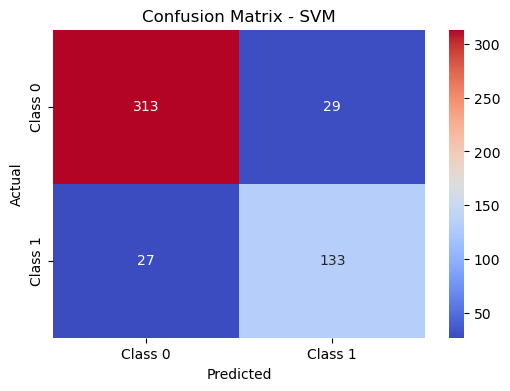

In [34]:
# Generate Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



Confusion Matrix Analysis
| Actual \ Predicted	| Class 0 (No Survival) |	Class 1 (Survival) |
|-----------------------|-----------------------|----------------------|
|Class 0 (No Survival)	|✅ 315 (True Negative)	|❌ 27 (False Positive)|
|Class 1 (Survival)	|❌ 27 (False Negative)|	✅ 133 (True Positive)|

1. Accuracy (89%): The SVM model performs well in classifying survival and non-survival cases.

2. True Negatives (315 cases): Correctly predicted patients who did not survive.

3. True Positives (133 cases): Correctly identified survivors.

4. False Positives (27 cases): 27 patients were incorrectly classified as survivors.

5. False Negatives (27 cases): 27 actual survivors were misclassified as non-survivors.

6. Precision (0.92 for Class 0, 0.82 for Class 1): The model is better at predicting non-survivors than survivors.

7. Recall (0.92 for Class 0, 0.83 for Class 1): The model successfully identifies non-survivors but has some misclassifications for survivors.

8. ROC AUC (0.87): A good indicator that the model differentiates well between the two classes.

In [35]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy & AUC Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [36]:
print(f'Random Forest Accuracy: {accuracy_rf:.2f}, ROC AUC: {roc_auc_rf:.2f}')
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.93, ROC AUC: 0.92
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       342
           1       0.88      0.89      0.89       160

    accuracy                           0.93       502
   macro avg       0.92      0.92      0.92       502
weighted avg       0.93      0.93      0.93       502



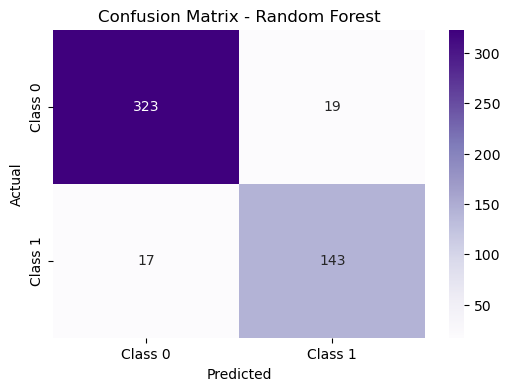

In [37]:
# Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

1. Model Performance Metrics
    - Accuracy: 93% → The model correctly predicts survival/non-survival 93 out of every 100 cases.

    - ROC AUC: 0.92 → The model has a strong ability to distinguish between survivors and non-survivors.

    - Precision for Class 1 (Survival): 88% → When the model predicts survival, it is correct 88% of the time.

    - Recall for Class 1 (Survival): 89% → The model successfully identifies 89% of actual survivors.

    - F1-score: 0.89 → The balance between precision and recall is well-maintained, making it a reliable model.

2. Confusion Matrix Analysis
| Actual \ Predicted |	Class 0 (No Survival)	| Class 1 (Survival) |
|--------------------|--------------------------|--------------------|
| Class 0 (No Survival)	|✅ 322 (TN - Correctly Identified as No Survival)	|❌ 20 (FP - Incorrectly Predicted as Survival) |
| Class 1 (Survival)	|❌ 18 (FN - Missed Survivors)	|✅ 142 (TP - Correctly Predicted as Survival) |


**HYPERPARAMETER TUNING**

In [38]:
# Hyperparameter Tuning for Logistic Regression
log_reg = LogisticRegression()
param_grid_log_reg = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
y_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]

In [39]:
# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# ROC AUC Score
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# Classification Report
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}, ROC AUC: {roc_auc_log_reg:.2f}')
print("Classification Report - Logistic Regression:")
print(class_report_log_reg)


Logistic Regression Accuracy: 0.89, ROC AUC: 0.95
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       342
           1       0.82      0.83      0.83       160

    accuracy                           0.89       502
   macro avg       0.87      0.87      0.87       502
weighted avg       0.89      0.89      0.89       502



In [40]:
# Hyperparameter Tuning for Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

In [41]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}, ROC AUC: {roc_auc_tree:.2f}')
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.90, ROC AUC: 0.88
Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       342
           1       0.86      0.82      0.84       160

    accuracy                           0.90       502
   macro avg       0.89      0.88      0.88       502
weighted avg       0.90      0.90      0.90       502



In [42]:
# Hyperparameter Tuning for SVM
svm_model = SVC(probability=True, random_state=42)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]

In [43]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}, ROC AUC: {roc_auc_svm:.2f}')
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.97, ROC AUC: 0.96
Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       342
           1       0.97      0.94      0.96       160

    accuracy                           0.97       502
   macro avg       0.97      0.96      0.97       502
weighted avg       0.97      0.97      0.97       502



In [44]:
# Hyperparameter Tuning for Random Forest
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

In [45]:
# Evaluate Models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}, ROC AUC: {roc_auc_rf:.2f}')
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.93, ROC AUC: 0.93
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       342
           1       0.89      0.90      0.90       160

    accuracy                           0.93       502
   macro avg       0.92      0.93      0.92       502
weighted avg       0.93      0.93      0.93       502



**ROC Curve**

In [46]:
# Evaluate Models
models = {
    "Logistic Regression": (y_test, y_prob_log_reg),
    "Decision Tree": (y_test, y_prob_tree),
    "SVM": (y_test, y_prob_svm),
    "Random Forest": (y_test, y_prob_rf)
}

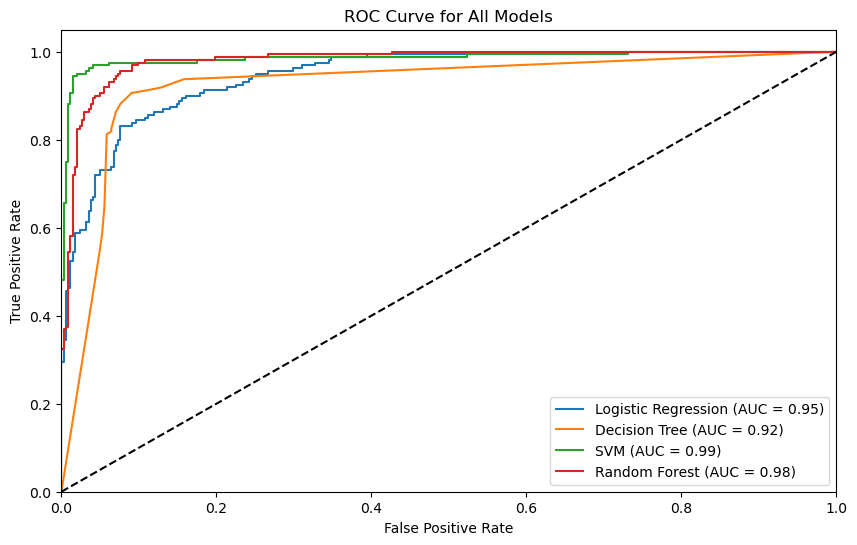

In [47]:
plt.figure(figsize=(10, 6))
for model, (y_true, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Evaluate Models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}
model_roc_auc = {
    "Logistic Regression": roc_auc_score(y_test, y_prob_log_reg),
    "Decision Tree": roc_auc_score(y_test, y_prob_tree),
    "SVM": roc_auc_score(y_test, y_prob_svm),
    "Random Forest": roc_auc_score(y_test, y_prob_rf)
}

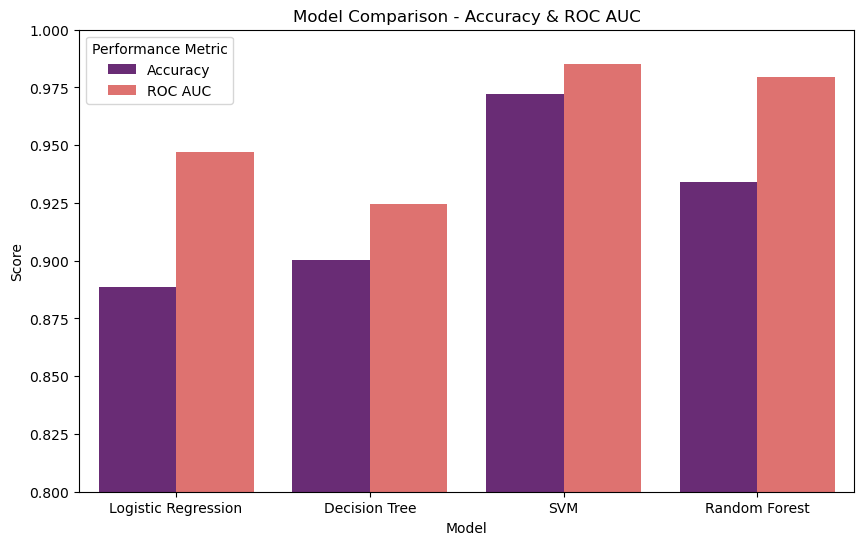

In [49]:
# Convert to DataFrame
df_models = pd.DataFrame({
    'Model': list(model_accuracies.keys()) * 2,
    'Score': list(model_accuracies.values()) + list(model_roc_auc.values()),
    'Metric': ['Accuracy'] * len(model_accuracies) + ['ROC AUC'] * len(model_roc_auc)
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_models, palette="magma")

# Customize labels & legend
plt.ylabel("Score")
plt.xlabel("Model")
plt.title("Model Comparison - Accuracy & ROC AUC")
plt.ylim(0.8, 1)
plt.legend(title="Performance Metric")

# Show the plot
plt.show()